In [ ]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns
import psycopg2
import json

In [12]:
conn = None
# Cargar credenciales desde el archivo JSON
try:
    with open("../credenciales.json", "r") as file:
        credenciales = json.load(file)
except Exception as e:
    print(f"Error al cargar el archivo JSON: {e}")
    credenciales = None

# Establecer la conexión
if credenciales:  # Solo intentar conectar si las credenciales se cargaron correctamente
    try:
        conn = psycopg2.connect(
            user=credenciales["user"],
            password=credenciales["password"],
            host=credenciales["host"],
            port=credenciales["port"],
            database=credenciales["database"]
        )
        print("¡Conexión exitosa!")
    except Exception as e:
        print(f"Error al conectar a la base de datos: {e}")
else:
    print("No se pudieron cargar las credenciales. No se puede establecer la conexión.")

¡Conexión exitosa!


In [15]:
# Cargar credenciales desde el archivo JSON
with open("../credenciales.json", "r") as file:
    credenciales = json.load(file)

# Crear la cadena de conexión
connection_string = f"postgresql+psycopg2://{credenciales['user']}:{credenciales['password']}@{credenciales['host']}:{credenciales['port']}/{credenciales['database']}"
engine = create_engine(connection_string)

# Cargar los datos desde la base de datos
df = pd.read_sql_table('candidates', engine)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   First Name                 50000 non-null  object        
 1   Last Name                  50000 non-null  object        
 2   Email                      50000 non-null  object        
 3   Application Date           50000 non-null  datetime64[ns]
 4   Country                    50000 non-null  object        
 5   YOE                        50000 non-null  int64         
 6   Seniority                  50000 non-null  object        
 7   Technology                 50000 non-null  object        
 8   Code Challenge Score       50000 non-null  float64       
 9   Technical Interview Score  50000 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 3.8+ MB


In [77]:
# 1. Contar valores nulos por columna
print("Valores nulos por columna:")
print(df.isnull().sum())

# 2. Contar filas duplicadas
print("\nNúmero de filas duplicadas:")
print(df.duplicated().sum())

# 3. Estadísticas descriptivas para columnas numéricas
print("\nEstadísticas descriptivas:")
df.describe()

Valores nulos por columna:
First Name                   0
Last Name                    0
Email                        0
Application Date             0
Country                      0
YOE                          0
Seniority                    0
Technology                   0
Code Challenge Score         0
Technical Interview Score    0
dtype: int64

Número de filas duplicadas:
0

Estadísticas descriptivas:


,Application Date,YOE,Code Challenge Score,Technical Interview Score
count,50000,50000.000000,50000.000000,50000.000000
mean,2020-04-03 23:04:14.592000,15.286980,4.996400,5.003880
min,2018-01-01 00:00:00,0.000000,0.000000,0.000000
25%,2019-02-17 00:00:00,8.000000,2.000000,2.000000
50%,2020-04-06 00:00:00,15.000000,5.000000,5.000000
75%,2021-05-21 00:00:00,23.000000,8.000000,8.000000
max,2022-07-04 00:00:00,30.000000,10.000000,10.000000
std,NaN,8.830652,3.166896,3.165082


desglosemos por variable: sera en orden segun el anterior codigo

empezaremos por 'First Name' y 'Last Name' ya que estos valores son muy homogeneos

In [101]:
# 1. Conteo de nombres y apellidos únicos
num_first_names = df['First Name'].nunique()
num_last_names = df['Last Name'].nunique()

print(f"Número de nombres únicos (First Name): {num_first_names}")
print(f"Número de apellidos únicos (Last Name): {num_last_names}")

# 2. Frecuencia de nombres y apellidos
print("\nFrecuencia de nombres (First Name):")
print(df['First Name'].value_counts())

print("\n======================================")
print("\nFrecuencia de apellidos (Last Name):")
print(df['Last Name'].value_counts())

# 3. Verificar y corregir nombres y apellidos
# Capitalizar nombres y apellidos (primera letra en mayúscula, el resto en minúscula)
df['First Name'] = df['First Name'].str.capitalize()
df['Last Name'] = df['Last Name'].str.capitalize()

# 4. Verificar espacios en nombres y apellidos
# Verificar espacios en First Name
num_nombres_con_espacios = df['First Name'].str.contains(' ', regex=False).sum()
print(f"\nNúmero de registros con nombres (First Name) que contienen espacios: {num_nombres_con_espacios}")

# Verificar espacios en Last Name
num_apellidos_con_espacios = df['Last Name'].str.contains(' ', regex=False).sum()
print(f"Número de registros con apellidos (Last Name) que contienen espacios: {num_apellidos_con_espacios}")

Número de nombres únicos (First Name): 3007
Número de apellidos únicos (Last Name): 474

Frecuencia de nombres (First Name):
First Name
Sarai        33
Elyse        32
Eva          31
Anabel       31
Nayeli       30
             ..
Willie        6
Janis         6
Paul          5
Gudrun        5
Antonetta     5
Name: count, Length: 3007, dtype: int64


Frecuencia de apellidos (Last Name):
Last Name
Murazik      138
Nitzsche     134
Harvey       133
Metz         133
Lang         133
            ... 
Kutch         83
Howe          82
White         79
Mcclure       78
Bechtelar     76
Name: count, Length: 474, dtype: int64

Número de registros con nombres (First Name) que contienen espacios: 0
Número de registros con apellidos (Last Name) que contienen espacios: 0


↑↑↑con esta informacion nos damos cuenta para saber cual es el primer/ultimo nombre mas popular entre todos, se podria sacar con respecto a esto una grafica que reuna los paises y que estos digan cual es el nombre mas usa de cada pais↑↑↑

↓↓↓ahora miraremos la columna 'Email'↓↓↓

In [ ]:
df['Email'].value_counts()

Email
fern70@gmail.com             3
marianne31@yahoo.com         3
hoyt52@yahoo.com             2
bertrand65@hotmail.com       2
rogers12@gmail.com           2
                            ..
marion91@hotmail.com         1
sister51@hotmail.com         1
marvin_parker@gmail.com      1
holden_lakin@gmail.com       1
abigayle.crooks@yahoo.com    1
Name: count, Length: 49833, dtype: int64

In [ ]:
# 1. Obtener los correos que aparecen más de una vez
emails_mas_veces = df['Email'].value_counts()[df['Email'].value_counts() > 1]

# 2. Filtrar el DataFrame original para incluir solo los correos que aparecen más de una vez
df_filtrado = df[df['Email'].isin(emails_mas_veces.index)]

# 3. Seleccionar las columnas de interés (First Name, Last Name y Email)
resultado = df_filtrado[['First Name', 'Last Name', 'Email']]

# 4. Agrupar por First Name y Last Name y contar cuántas veces aparecen
nombres_duplicados = df_filtrado.groupby(['First Name', 'Last Name']).size().reset_index(name='count')

# 5. Filtrar los nombres y apellidos que aparecen más de una vez
nombres_duplicados = nombres_duplicados[nombres_duplicados['count'] > 1]

# 6. Contar cuántas personas tienen correos repetidos
total_personas_con_correo_repetido = len(df_filtrado)

# 7. Mostrar los resultados
print("Nombres y apellidos duplicados en cuentas con correos repetidos:")
print(nombres_duplicados)

print(f"\nTotal de personas con correo repetido: {total_personas_con_correo_repetido}")

print("\nDetalle de personas con correos repetidos:")
print(resultado)

Nombres y apellidos duplicados en cuentas con correos repetidos:
Empty DataFrame
Columns: [First Name, Last Name, count]
Index: []

Total de personas con correo repetido: 332

Detalle de personas con correos repetidos:
      First Name   Last Name                    Email
37        Grayce       Boyer      matilda17@gmail.com
42         River      Erdman      dewayne50@gmail.com
385       Kailee  Konopelski       sandra83@gmail.com
455      Clemmie     Gleason         kadin0@gmail.com
469        Lelia      Nienow      ilene47@hotmail.com
...          ...         ...                      ...
49236     Katlyn       Moore      stephen39@yahoo.com
49819     Kaylin       Hills  alejandra17@hotmail.com
49828    Mozelle   O'Connell      fiona72@hotmail.com
49905       Mark      Rippin     callie59@hotmail.com
49912  Anastasia       Zieme       esteban3@yahoo.com

[332 rows x 3 columns]


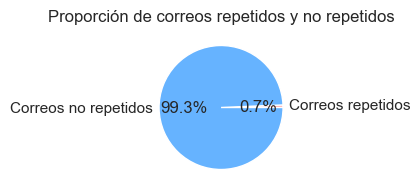

In [48]:
# Calcular la proporción de correos repetidos y no repetidos
total_correos = len(df)
correos_repetidos = len(df_filtrado)
correos_no_repetidos = total_correos - correos_repetidos

# Crear la gráfica de pastel
plt.figure(figsize=(2, 3))
plt.pie([correos_repetidos, correos_no_repetidos], labels=["Correos repetidos", "Correos no repetidos"], autopct='%1.1f%%', colors=["#ff9999", "#66b3ff"])
plt.title("Proporción de correos repetidos y no repetidos")
plt.show()

↑↑↑con esto concluimos que un pequño porcentaje de esta muestra de la poblacion mundial nos indica que en la base de datos han sido utilizados los mismos correos por distintas personas, esto puede generar problemas↑↑↑

In [102]:
df['Application Date'].value_counts()

Application Date
2020-07-07    50
2018-12-06    48
2020-07-18    47
2019-09-01    47
2021-07-31    47
              ..
2022-01-05    17
2020-05-03    16
2019-08-31    16
2019-03-27    15
2022-01-08    14
Name: count, Length: 1646, dtype: int64

↓↓↓seguimos con la columna 'Country'↓↓↓

In [106]:
# 1. Contar el número de países diferentes
num_paises_unicos = df['Country'].nunique()
print(f"Número de países diferentes: {num_paises_unicos}")

# 2. Obtener la frecuencia de cada país
frecuencia_paises = df['Country'].value_counts()
print("\nFrecuencia de cada país:")
print(frecuencia_paises)

# 3. Obtener la lista de países únicos
paises_unicos = df['Country'].unique()

# 4. Mostrar la lista de países únicos
print("\nLista de países únicos:")
print(paises_unicos)

Número de países diferentes: 244

Frecuencia de cada país:
Country
Malawi                          242
Spain                           238
Svalbard & Jan Mayen Islands    234
Cook Islands                    234
Netherlands Antilles            234
                               ... 
Libyan Arab Jamahiriya          172
Cape Verde                      172
Isle of Man                     170
Tanzania                        165
Cocos (Keeling) Islands         164
Name: count, Length: 244, dtype: int64

Lista de países únicos:
['Norway' 'Panama' 'Belarus' 'Eritrea' 'Myanmar' 'Zimbabwe'
 'Wallis and Futuna' 'Italy' 'Timor-Leste' 'Armenia'
 'French Southern Territories' 'Chad' 'El Salvador' 'Mozambique'
 'Brunei Darussalam' 'Morocco' 'Saint Helena' 'Portugal'
 'Central African Republic' 'Seychelles' 'Dominica' 'Finland' 'Belgium'
 'Niue' 'Japan' 'Palestinian Territory' 'Faroe Islands' 'Latvia'
 'Saudi Arabia' 'Poland' 'Micronesia' 'Macao' 'Bangladesh' 'Taiwan'
 'Slovakia (Slovak Republic)' 'Me

dd

In [32]:
df['Seniority'].value_counts()

Seniority
Intern       7255
Mid-Level    7253
Trainee      7183
Junior       7100
Architect    7079
Lead         7071
Senior       7059
Name: count, dtype: int64

In [33]:
df['Technology'].value_counts()

Technology
Game Development                           3818
DevOps                                     3808
Social Media Community Management          2028
System Administration                      2014
Mulesoft                                   1973
Development - Backend                      1965
Development - FullStack                    1961
Adobe Experience Manager                   1954
Data Engineer                              1951
Security                                   1936
Development - CMS Frontend                 1934
Business Intelligence                      1934
Database Administration                    1933
Client Success                             1927
Design                                     1906
QA Manual                                  1902
Technical Writing                          1901
QA Automation                              1892
Sales                                      1890
Development - Frontend                     1887
Development - CMS Backend    